In [2]:
import numpy as np
import pandas as pd
df = pd.read_excel("Calls.xlsx")
print("length of data",len(df))
print(df.head(5))

length of data 33
       Date  Calls
0  2017-1-1  18600
1  2017-2-1  21150
2  2017-3-1  29675
3  2017-4-1  22675
4  2017-5-1  22900


In [3]:
df['Calls2'] = df['Calls']

In [4]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

series = pd.read_excel('Calls.xlsx', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

Date
2017-01-01    18600
2017-02-01    21150
2017-03-01    29675
2017-04-01    22675
2017-05-01    22900
Name: Calls, dtype: int64


<Figure size 640x480 with 1 Axes>

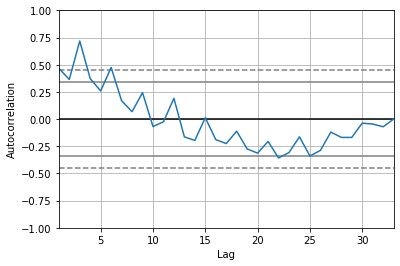

In [190]:
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

series = pd.read_excel('Calls.xlsx', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

In [5]:

model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

NameError: name 'ARIMA' is not defined

In [6]:
from math import sqrt 
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = sqrt(mean_squared_error(test, predictions))
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

NameError: name 'ARIMA' is not defined